In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

### data analys

In [2]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [3]:
#Datasets as numpy arrays
train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype='float32')

In [4]:
#Define class labels for easy interpretation
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

Label for the image is:  W


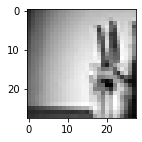

In [5]:
#Sanity check - plot a few images and labels
i = random.randint(1,train.shape[0])
fig1, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28)), cmap='gray') 
print("Label for the image is: ", class_names[int(train_data[i,0])])

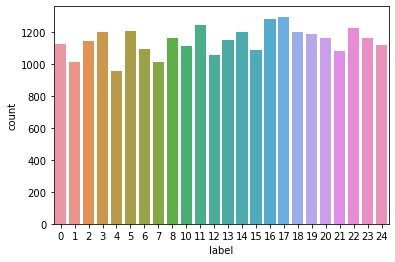

In [6]:
# Data distribution visualization

sns.countplot(x= train['label'])
plt.show()

Text(0.5, 1.0, 'Label')

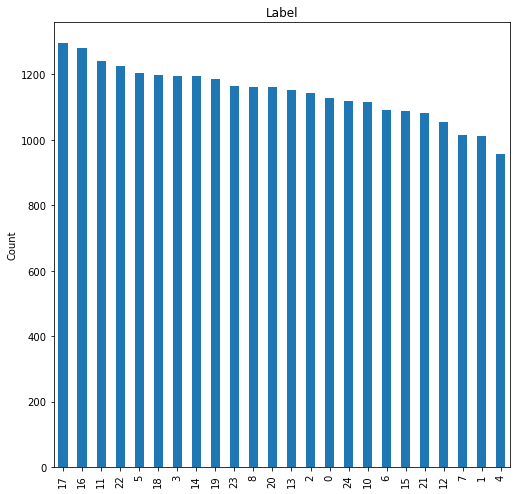

In [7]:
#Dataset seems to be fairly balanced but class 4 could couse us problem!

fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')

### Data Cleaning

In [8]:
train.isna().sum().sort_values(ascending=True)

label       0
pixel517    0
pixel518    0
pixel519    0
pixel520    0
           ..
pixel264    0
pixel265    0
pixel266    0
pixel268    0
pixel784    0
Length: 785, dtype: int64

In [9]:
test.isna().sum().sort_values(ascending=True)

label       0
pixel517    0
pixel518    0
pixel519    0
pixel520    0
           ..
pixel264    0
pixel265    0
pixel266    0
pixel268    0
pixel784    0
Length: 785, dtype: int64

In [10]:
train = train.drop_duplicates()
test  = test.drop_duplicates()

In [11]:
#Normalize / scale X values

X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.

In [12]:
#Convert y to categorical if planning on using categorical cross entropy
#No need to do this if using sparse categorical cross entropy
y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)

In [13]:
#Reshape for the neural network
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [14]:
#Model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(25, activation = 'softmax'))

In [15]:
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [16]:
#history = model.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
history = model.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test_cat))

Epoch 1/10
215/215 [==============================] - 11s 49ms/step - loss: 2.5426 - acc: 0.2177 - val_loss: 1.5908 - val_acc: 0.5132
Epoch 2/10
215/215 [==============================] - 17s 78ms/step - loss: 1.1165 - acc: 0.6209 - val_loss: 0.7746 - val_acc: 0.7486
Epoch 3/10
215/215 [==============================] - 18s 83ms/step - loss: 0.6576 - acc: 0.7763 - val_loss: 0.5598 - val_acc: 0.8020
Epoch 4/10
215/215 [==============================] - 18s 83ms/step - loss: 0.4429 - acc: 0.8491 - val_loss: 0.4069 - val_acc: 0.8539
Epoch 5/10
215/215 [==============================] - 18s 82ms/step - loss: 0.3092 - acc: 0.8952 - val_loss: 0.3372 - val_acc: 0.8868
Epoch 6/10
215/215 [==============================] - 18s 82ms/step - loss: 0.2291 - acc: 0.9255 - val_loss: 0.2987 - val_acc: 0.8949
Epoch 7/10
215/215 [==============================] - 18s 82ms/step - loss: 0.1720 - acc: 0.9423 - val_loss: 0.2541 - val_acc: 0.9140
Epoch 8/10
215/215 [==============================] - 17s 80ms

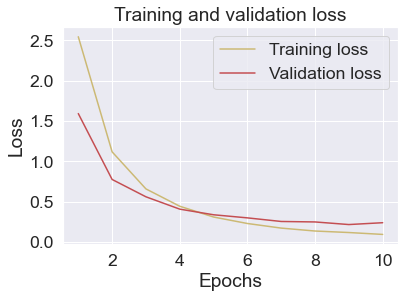

In [24]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

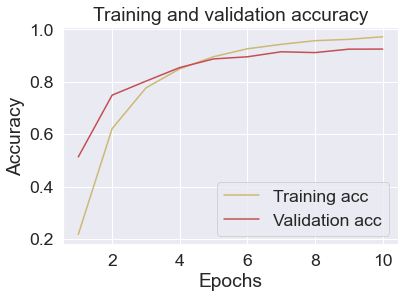

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
#prediction = model.predict_classes(X_test)
prediction=model.predict(X_test) 
classes_x=np.argmax(prediction,axis=1)


Predicted Label:  H
True Label:  H


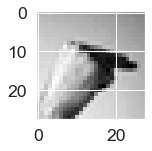

In [27]:
i = random.randint(1,len(prediction))
fig1, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(X_test[i,:,:,0].reshape((28,28)), cmap='gray') 
print("Predicted Label: ", class_names[int(classes_x[i])])
print("True Label: ", class_names[int(y_test[i])])

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(y_test, classes_x)

In [30]:
cm = pd.DataFrame(cm , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])

<AxesSubplot:>

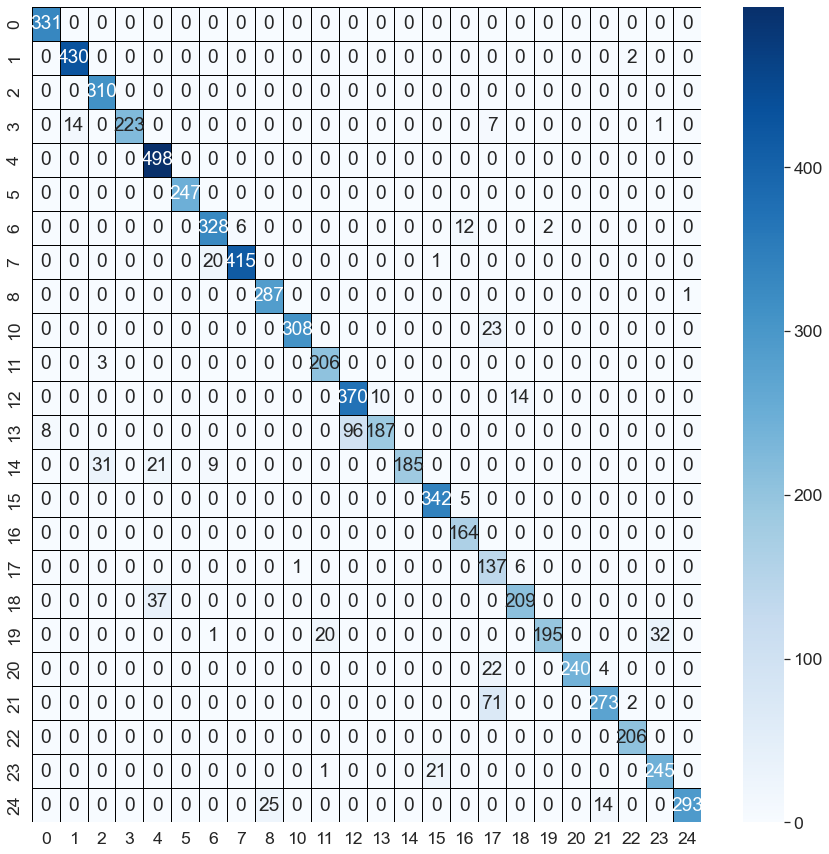

In [31]:
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

([<matplotlib.axis.XTick at 0x186a995e3d0>,
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E'),
  Text(5, 0, 'F'),
  Text(6, 0, 'G'),
  Text(7, 0, 'H'),
  Text(8, 0, 'I'),
  Text(9, 0, 'J'),
  Text(10, 0, 'K'),
  Text(11, 0, 'L'),
  Text(12, 0, 'M'),
  Text(13, 0, 'N'),
  Text(14, 0, 'O'),
  Text(15, 0, 'P'),
  Text(16, 0, 'Q'),
  Text(17, 0, 'R'),
  Text(18, 0, 'S'),
  Text(19, 0, 'T'),
  Text(20, 0, 'U'),
  Text(21, 0, 'V'),
  Text(22, 0, 'W'),
  Text(23, 0, 'X'),
  Text(24, 0, 'Y')])

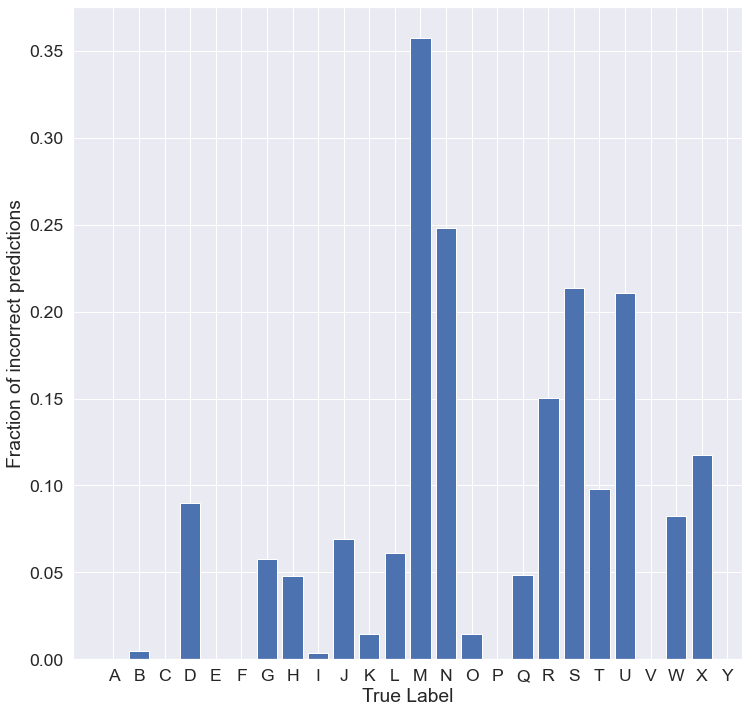

In [44]:
#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(np.arange(24), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(25), class_names) 